In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(15,15)

tcms = pd.read_csv('tcms_total.csv')

In [2]:
tcms["ganador"] = np.where(tcms.artista.isin(["Angy", "Roko", "Edurne", "Ruth Lorenzo", "Blas Cantó", "Miquel Fernández", "María Villalón"]), 1, 0)

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [47]:
df1 = tcms[tcms.programa < 4][['temporada', 'artista','ganador','programa', 'cancion', 'j1','j2','j3','j4','publico']].melt(id_vars=['temporada', 'artista','ganador','cancion', 'programa'], value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

In [48]:
df1.head()

,temporada,artista,ganador,cancion,programa,jurado,puntuacion
0,1,Angy,1,"Born This Way, de Lady Gaga",1,j1,12
1,1,Angy,1,"Me gustas mucho, de Rocío Dúrcal",2,j1,10
2,1,Angy,1,Only Girl (In the World) de Rihanna,3,j1,9
3,1,Toñi Salazar,0,"Pena, penita, pena, de Lola Flores",1,j1,10
4,1,Toñi Salazar,0,"La, la, la, de Massiel",2,j1,4


In [44]:
df1.groupby('artista').mean().reset_index().sort_values('ganador')

,artista,ganador,programa,puntuacion
0,Adrián Rodríguez,0.0,2.0,9.466667
67,Ángela Carrasco,0.0,2.0,4.900000
35,"Julio Iglesias, Jr.",0.0,2.0,5.666667
36,La Terremoto de Alcorcón,0.0,2.0,6.133333
37,Llum Barrera,0.0,2.0,7.866667
...,...,...,...,...
19,Edurne,1.0,2.0,8.066667
3,Angy,1.0,2.0,7.200000
45,María Villalón,1.0,2.0,9.600000
57,Ruth Lorenzo,1.0,2.0,9.000000


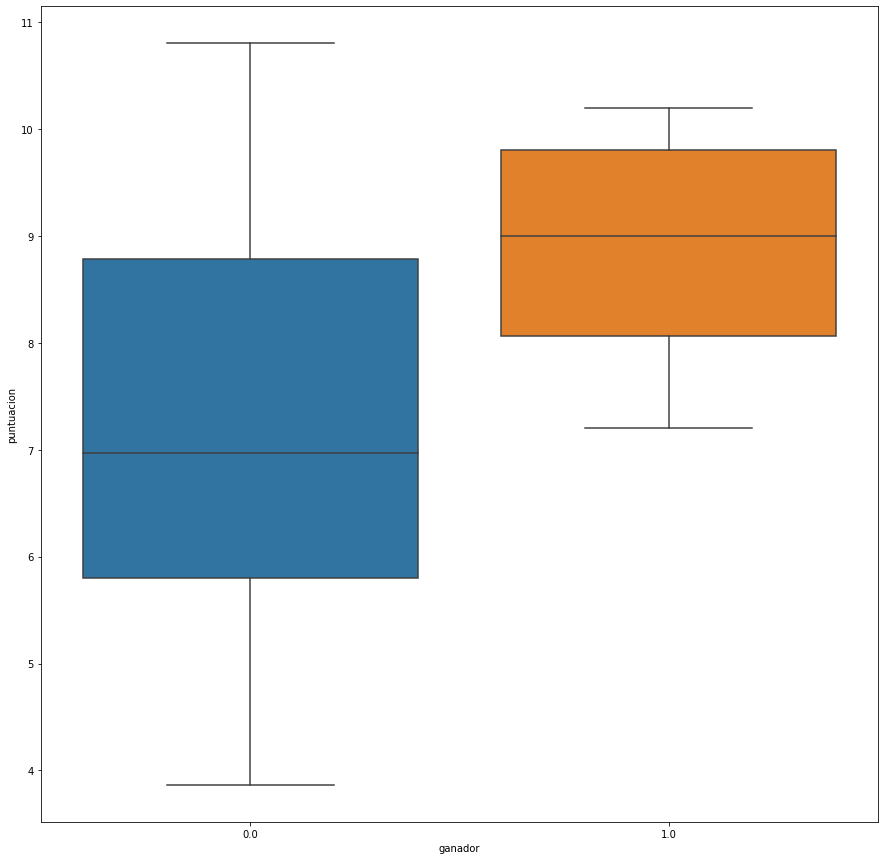

In [27]:
sns.boxplot(data=df1.groupby('artista').mean().reset_index(), x='ganador', y='puntuacion')

In [60]:
data.head()

programa,artista,temporada,ganador,1,2,3
0,Adrián Rodríguez,4,0,8.6,9.2,10.6
1,Ana Morgade,4,0,5.4,6.4,6.6
2,Anabel Alonso,7,0,5.0,6.0,4.4
3,Angy,1,1,9.2,6.4,6.0
4,Anna Simon,2,0,7.0,4.0,6.4


In [49]:
data = df1.pivot_table(index=['artista', 'temporada', 'ganador'], values='puntuacion', columns='programa', fill_value=0).reset_index()

In [61]:
len(data)

70

In [82]:
data.set_index('artista', inplace=True)

In [103]:
X_train = data[data.temporada < 8][[1,2,3]]
y_train = data[data.temporada < 8]['ganador']

In [104]:
model = LogisticRegression().fit(X_train, y_train)

In [105]:
model.score(X_train, y_train)

0.8852459016393442

In [106]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_train, model.predict(X_train))

array([[54,  0],
       [ 7,  0]])

In [93]:
X_test = data[data.temporada == 7][[1,2,3]]

In [94]:
len(X_test)

9

In [95]:
y_pred = model.predict(X_test)

In [96]:
X_test[y_pred == 1]

programa,1,2,3
artista,,,
Soraya Arnelas,11.6,9.6,8.4


In [99]:
data.head()

programa,temporada,ganador,1,2,3
artista,,,,,
Adrián Rodríguez,4,0,8.6,9.2,10.6
Ana Morgade,4,0,5.4,6.4,6.6
Anabel Alonso,7,0,5.0,6.0,4.4
Angy,1,1,9.2,6.4,6.0
Anna Simon,2,0,7.0,4.0,6.4


In [98]:
for temporada in range(1,8):
    X_train = data[data.temporada != temporada][[1,2,3]]
    y_train = data[data.temporada != temporada]['ganador']
    model = LogisticRegression().fit(X_train, y_train)
    print(model.score(X_train, y_train))
    X_test = data[data.temporada == temporada][[1,2,3]]
    y_pred = model.predict(X_test)
    
    display(X_test[y_pred == 1])

0.9032258064516129


programa,1,2,3
artista,,,


0.9032258064516129


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


In [79]:
tcms[tcms.temporada == 8]

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria,ganador
955,8,1,Soldi de Mahmood,Jorge González,11,12,12,11,12,NaN,...,Soldi,Mahmood,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
956,8,2,En el último minuto de Miguel Poveda,Jorge González,6,11,10,4,11,NaN,...,En el último minuto,Miguel Poveda,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
957,8,3,Mariana mambo de Chayanne,Jorge González,9,11,10,11,10,NaN,...,Mariana mambo,Chayanne,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
958,8,4,"Relax, Take It Easy de Mika",Jorge González,9,9,8,9,6,NaN,...,"Relax, Take It Easy",Mika,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
959,8,5,No me des guerra de Bambino,Jorge González,10,11,11,10,11,NaN,...,No me des guerra,Bambino,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,8,7,Dance Monkey de Tones and I,Belinda Washington,12,12,12,12,12,NaN,...,Dance Monkey,Tones and I,NaN,España,Madrid,Altrincham,F,56,TV,0
1050,8,8,The Shoop Shoop Song (It's in His Kiss) de Che...,Belinda Washington,7,0,8,10,9,NaN,...,The Shoop Shoop Song (It's in His Kiss),Cher (Sorpresa ¡Sorpresa!),Sorpresa,España,Madrid,Altrincham,F,56,TV,0
1051,8,9,Human de Rag'n'Bone Man,Belinda Washington,9,9,8,11,12,NaN,...,Human,Rag'n'Bone Man,NaN,España,Madrid,Altrincham,F,56,TV,0
1052,8,10,Gigi l'amoroso de Dalida,Belinda Washington,6,4,4,4,6,NaN,...,Gigi l'amoroso,Dalida,NaN,España,Madrid,Altrincham,F,56,TV,0
